In [ ]:
import psycopg2
import pandas as pd

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
from google.colab import files
files.upload()

Saving officer_css_summary.csv to officer_css_summary.csv


{'officer_css_summary.csv': b'officer_id,css,summary\n25864,16,"On 06 August 2009, a complaint was registered with the Independent Police Review Authority (IPRA) regarding an incident that occurred in the 16th District, on August 4, 2009. It was alleged that a Chicago Police Department officer improperly handcuffed the complainant; handcuffed the complainant without justification; searched the residence of the complainant without consent and; threatened to arrest complainant in the event that the complainant should register a complaint against him. IPRA recommended to SUSTAIN the following allegations of violations committed by the accused: improperly handcuffed the complainant; handcuffed the complainant without justification and; searched the residence of the complainant without consent against the accused member based on corroborating witness statements, the officers statement, and reports. IPRA recommended a five (5) day suspension for the accused member."\n23361,5.078,"In an incid

In [ ]:
# Loading in the training data with Pandas
data = pd.read_csv("officer_css_summary.csv")
data.head()

,officer_id,css,summary
0,25864,16.000,"On 06 August 2009, a complaint was registered ..."
1,23361,5.078,In an incident involving an off-duty CPD offic...
2,21210,2.440,"On June 5, 2011, a complaint was registered wi..."
3,14739,5.450,was involved in a traffic collision with Based...
4,16338,3.725,"On January 4, 2007, a complaint was registered..."


In [ ]:
data.shape

(1921, 3)

In [ ]:
data['officer_id'].nunique()

1681

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [ ]:
data['scores'] = data['summary'].apply(lambda x: sid.polarity_scores(x))

data.head()

,officer_id,css,summary,scores
0,25864,16.000,"On 06 August 2009, a complaint was registered ...","{'neg': 0.234, 'neu': 0.7, 'pos': 0.066, 'comp..."
1,23361,5.078,In an incident involving an off-duty CPD offic...,"{'neg': 0.162, 'neu': 0.822, 'pos': 0.016, 'co..."
2,21210,2.440,"On June 5, 2011, a complaint was registered wi...","{'neg': 0.156, 'neu': 0.767, 'pos': 0.077, 'co..."
3,14739,5.450,was involved in a traffic collision with Based...,"{'neg': 0.037, 'neu': 0.905, 'pos': 0.057, 'co..."
4,16338,3.725,"On January 4, 2007, a complaint was registered...","{'neg': 0.209, 'neu': 0.745, 'pos': 0.047, 'co..."


In [ ]:
data['compound'] = data['scores'].apply(lambda x: x['compound'])
data['neg'] = data['scores'].apply(lambda x: x['neg'])
data['pos'] = data['scores'].apply(lambda x: x['pos'])
data['neu'] = data['scores'].apply(lambda x: x['neu'])
data.drop('scores', axis=1, inplace=True)

In [ ]:
data = data.groupby("officer_id", as_index=False)[['css', 'compound', 'pos', 'neg', 'neu']].mean()

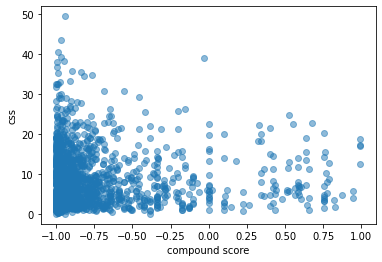

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['compound'], data['css'], alpha=0.5)
plt.xlabel('compound score')
plt.ylabel('css')
plt.show()

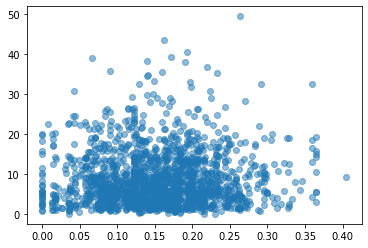

In [ ]:
plt.scatter(data['neg'], data['css'], alpha=0.5)
plt.xlabel('neg')
plt.ylabel('css')
plt.show()

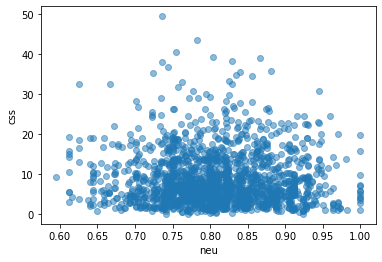

In [ ]:
plt.scatter(data['neu'], data['css'], alpha=0.5)
plt.xlabel('neu')
plt.ylabel('css')
plt.show()

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = data[['compound', 'pos', 'neg', 'neu']] 
Y = data['css']
X = sm.add_constant(X) # adding a constant

In [ ]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    css   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7910
Date:                Wed, 01 Dec 2021   Prob (F-statistic):              0.531
Time:                        21:37:53   Log-Likelihood:                -5575.2
No. Observations:                1681   AIC:                         1.116e+04
Df Residuals:                    1676   BIC:                         1.119e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        328.5081    398.948      0.823      0.4